<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/BigMartSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the sale of an item based on it's various attributes(features)

1.   List item
2.   List item



In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [242]:
dataset = pd.read_csv('/content/Train.csv')

In [243]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [244]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [245]:
dataset['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [246]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Handling missing values
Numerical values-> we will replace the missing values by mean of that column

Categorical values-> we will replace the missing values by mode of that column

In [247]:
# filling the Item_Weight missing values with it's mean
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace=True)
dataset['Item_Weight'].isnull().sum()

0

In [248]:
# we can replace NaN values in Outlet_Size by finding the mode of the whole column but that is an inefficient method, 
# we rather replace the NaN values by correlating it with 'Outlet_Type', as both are kind of correlated to each other, 
# this gives us a better estimation of the NaN values 

mode_of_outlet_size = dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
# lambda is similar to def, except lambda is used when you only want to use it once unlike def which can be reused
# multiple times by simply writing def function_name()

print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [249]:
# as you can infer from above that for grocery store the mode is small, supermarket type3 is medium and so on
# now we can replace the NaN values accordingly

missing_values =  dataset['Outlet_Size'].isnull() # true-> null value, false-> not a null value
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [250]:
dataset.loc[missing_values, 'Outlet_Size'] = dataset.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Data Analysis

In [251]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

<ipython-input-252-d12795c192af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_Weight'])


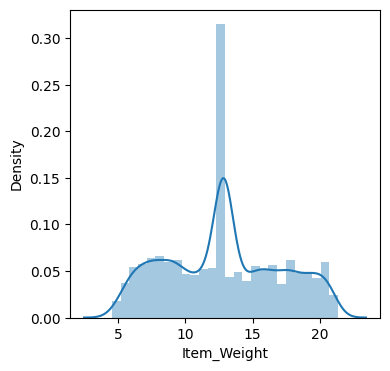

In [252]:
# Item_Weight distribution
plt.figure(figsize=(4,4))
sns.distplot(dataset['Item_Weight'])
plt.show()

<ipython-input-253-8a72189c8468>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_Visibility'])


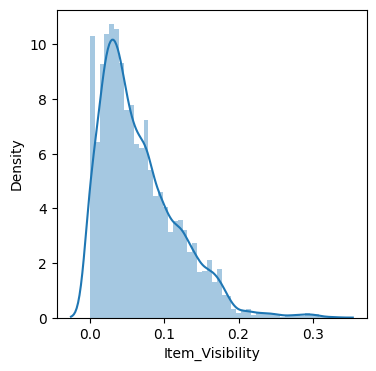

In [253]:
# Item_Visibility distribution
plt.figure(figsize=(4,4))
sns.distplot(dataset['Item_Visibility'])
plt.show()

<ipython-input-254-a20491a5815c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Item_MRP'])


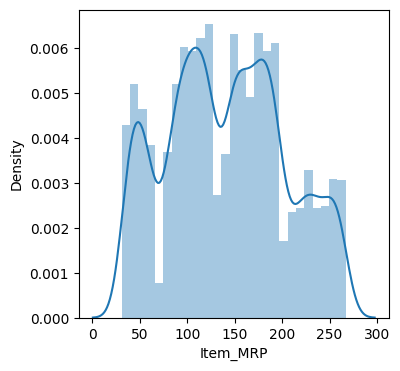

In [254]:
# Item_MRP distribution
plt.figure(figsize=(4,4))
sns.distplot(dataset['Item_MRP'])
plt.show()

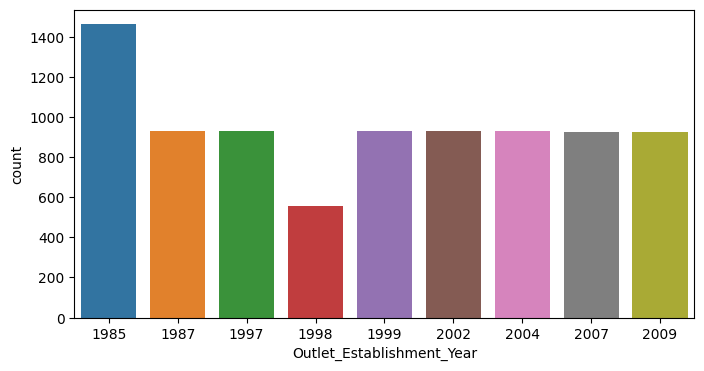

In [255]:
# count plot of Outlet_Establishment_Year
plt.figure(figsize=(8,4))
sns.countplot(x=dataset['Outlet_Establishment_Year'], data=dataset)
plt.show()

Categorical Features

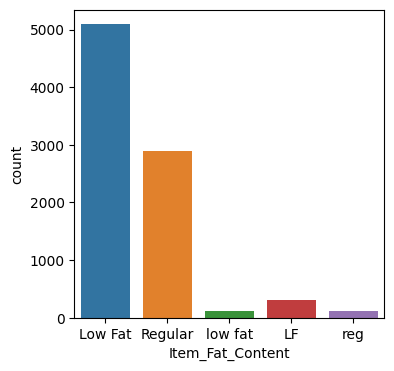

In [256]:
# count plot of Item_Fat_Content             
plt.figure(figsize=(4,4))
sns.countplot(x=dataset['Item_Fat_Content'], data=dataset)
plt.show()
# below Low Fat, low fat and LF means the same, whereas Regular and reg is the same, so we must merge them

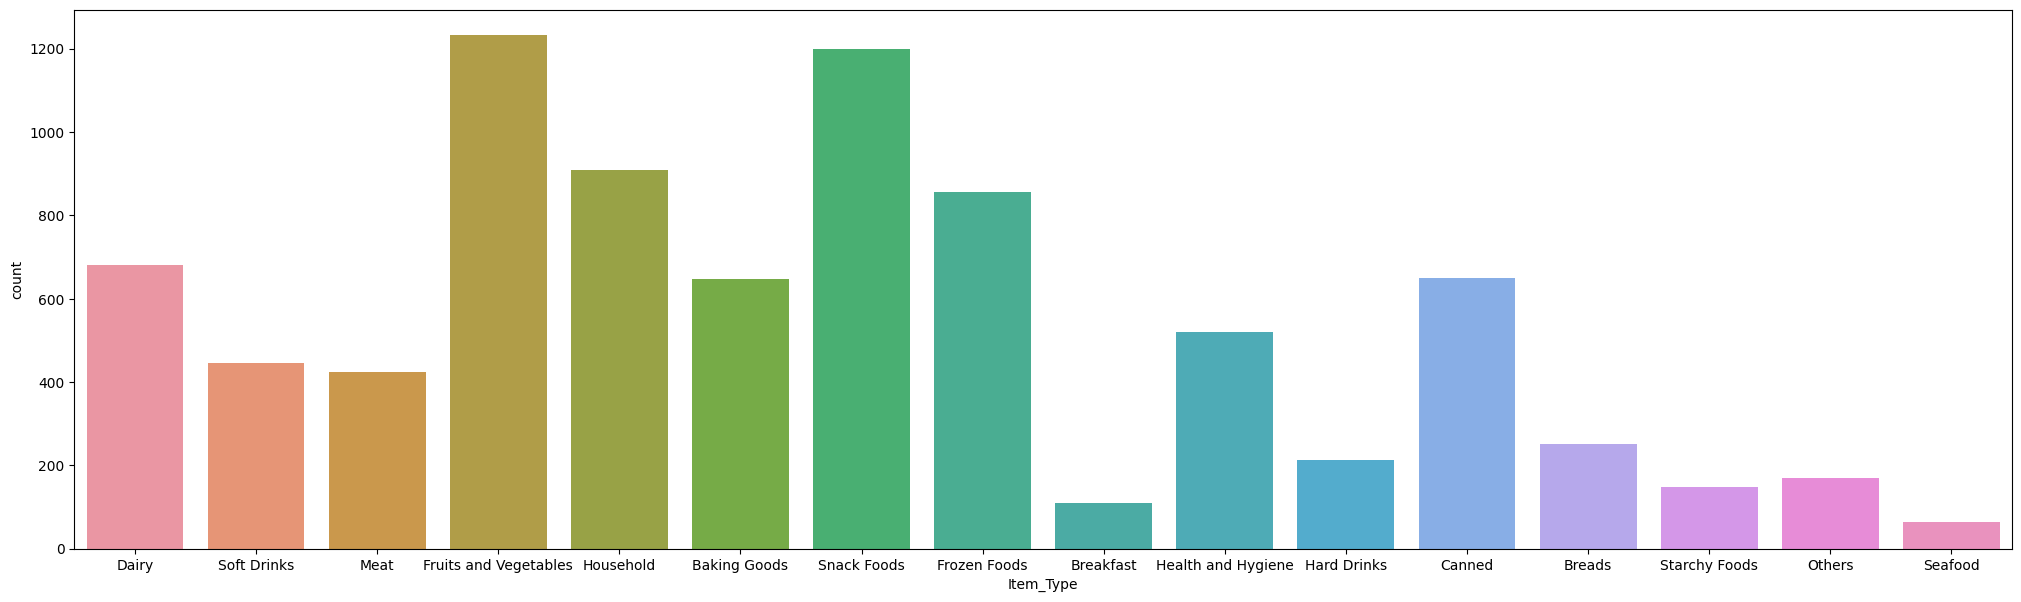

In [257]:
# count plot of Item_Type             
plt.figure(figsize=(25,7))
sns.countplot(x=dataset['Item_Type'], data=dataset)
plt.show()

In [258]:
for i in range(len(dataset['Outlet_Size'])):
  dataset['Outlet_Size'][i] = str(dataset['Outlet_Size'][i])

<ipython-input-258-b764927f0119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Outlet_Size'][i] = str(dataset['Outlet_Size'][i])


In [259]:
dataset['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [260]:
dataset['Outlet_Size'].head()

0    Medium
1    Medium
2    Medium
3     Small
4      High
Name: Outlet_Size, dtype: object

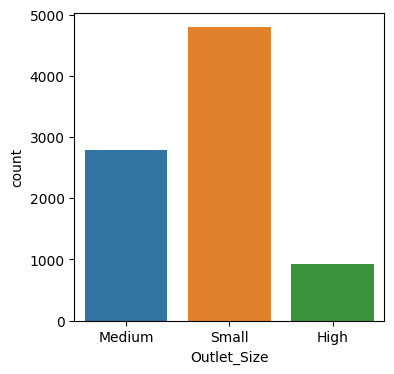

In [261]:
# count plot of Outlet_Size             
plt.figure(figsize=(4,4))
sns.countplot(x=dataset['Outlet_Size'], data=dataset)
plt.show()

#Data Pre-Processing

In [262]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [263]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [264]:
# merging LF, low fat, Low Fat
dataset = dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}})
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [265]:
encoder = LabelEncoder()

In [266]:
dataset['Item_Identifier'] = encoder.fit_transform(dataset['Item_Identifier'])
dataset['Item_Fat_Content'] = encoder.fit_transform(dataset['Item_Fat_Content'])
dataset['Item_Type'] = encoder.fit_transform(dataset['Item_Type'])
dataset['Outlet_Identifier'] = encoder.fit_transform(dataset['Outlet_Identifier'])
dataset['Outlet_Size'] = encoder.fit_transform(dataset['Outlet_Size'])
dataset['Outlet_Location_Type'] = encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Type'] = encoder.fit_transform(dataset['Outlet_Type'])

In [267]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting and Training the dataset

In [268]:
x = dataset.drop(columns='Item_Outlet_Sales', axis=1)
y = dataset['Item_Outlet_Sales']
print(x.shape)
print(y.shape)

(8523, 11)
(8523,)


In [269]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [270]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [271]:
training_data_prediction = model.predict(x_train)
score1 = metrics.r2_score(y_train, training_data_prediction)
print(score1)

0.8639680373364909


In [272]:
test_data_prediction = model.predict(x_test)
score2 = metrics.r2_score(y_test, test_data_prediction)
print(score2)

0.5233136709735687
